### Import required libraries 

In [66]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and inspect data

In [67]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [68]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [69]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [70]:
leads_df.shape

(9240, 37)

### Data cleaning and preparation

In [71]:
#Get null%

round(100*(leads_df.isnull().sum()/len(leads_df)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [72]:
#drop columns with null% >35 and get null%
for col in leads_df.columns:
    if leads_df[col].isnull().sum()*100/len(leads_df) > 35:
        leads_df.drop(col, 1, inplace=True)
    

In [73]:
round(100*(leads_df.isnull().sum()/len(leads_df)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [74]:
#Drop unwanted columns

leads_df.drop(['City','Country','How did you hear about X Education','Lead Profile','Prospect ID', 'Lead Number'], axis = 1, inplace = True)

leads_df.shape

(9240, 25)

In [75]:
# Drop columns as it conatins mostly one type of values for all datapoints
leads_df.drop(['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

leads_df.shape

(9240, 12)

In [76]:
#Get null%

round(100*(leads_df.isnull().sum()/len(leads_df)))

Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            16.0
What is your current occupation           29.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [77]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [78]:
#Specialization has select values that can be null

leads_df = leads_df.replace('Select',np.nan)

In [79]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Modified


In [80]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [81]:
cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

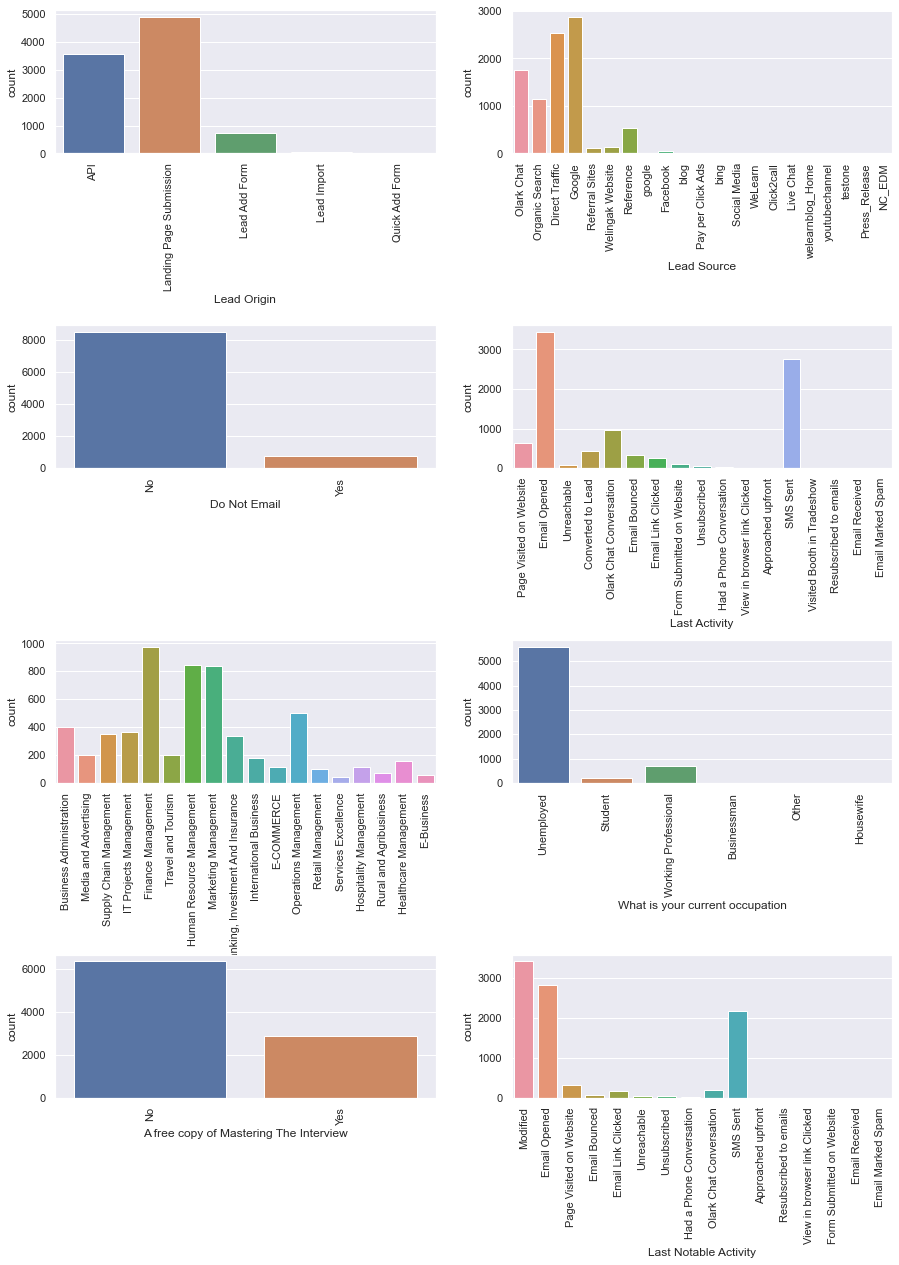

In [82]:
#Data visualization of categorical col

plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=leads_df)
    plt.xticks(rotation=90)
plt.show()

In [83]:
num_cols= leads_df.select_dtypes(include=['int64', 'float64' ]).columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

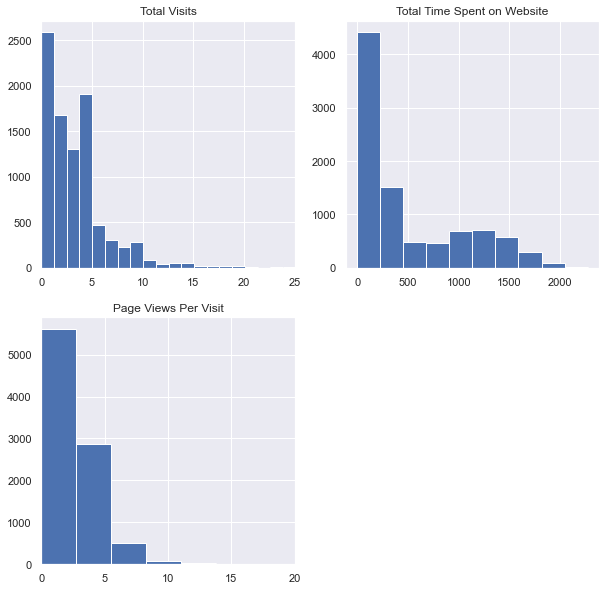

In [84]:
#Data visualization of numerical col
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [85]:
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [86]:
#update nan values as not selected
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'NotSelected')
leads_df['Specialization'].value_counts(dropna=False)

NotSelected                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [87]:
#Working on ""What is your current occupation""
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [88]:
# update Nan as Unemployed, as it can be students
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [89]:
#Get null%

round(100*(leads_df.isnull().sum()/len(leads_df)))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               1.0
Total Time Spent on Website               0.0
Page Views Per Visit                      1.0
Last Activity                             1.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [90]:
#drop all the rows which conatins null values as null % is low
leads_df = leads_df[leads_df.isnull().sum(axis=1) <1]

In [91]:
round(100*(leads_df.isnull().sum()/len(leads_df)))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

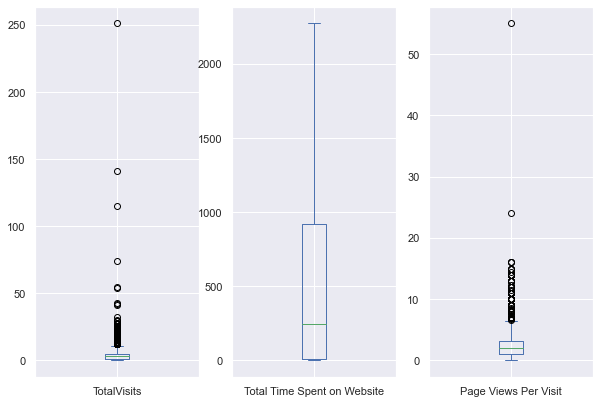

In [92]:
# Check for Outliers in Numeric variables
plt.figure(figsize=(10,15))
plt.subplot(2,3,1)
leads_df.TotalVisits.plot.box()
plt.subplot(2,3,2)
leads_df['Total Time Spent on Website'].plot.box()
plt.subplot(2,3,3)
leads_df['Page Views Per Visit'].plot.box()
plt.show()

In [93]:
outl = leads_df[['TotalVisits','Page Views Per Visit']]
outl.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
90%,7.000000,5.000000
99%,17.000000,9.000000
max,251.000000,55.000000


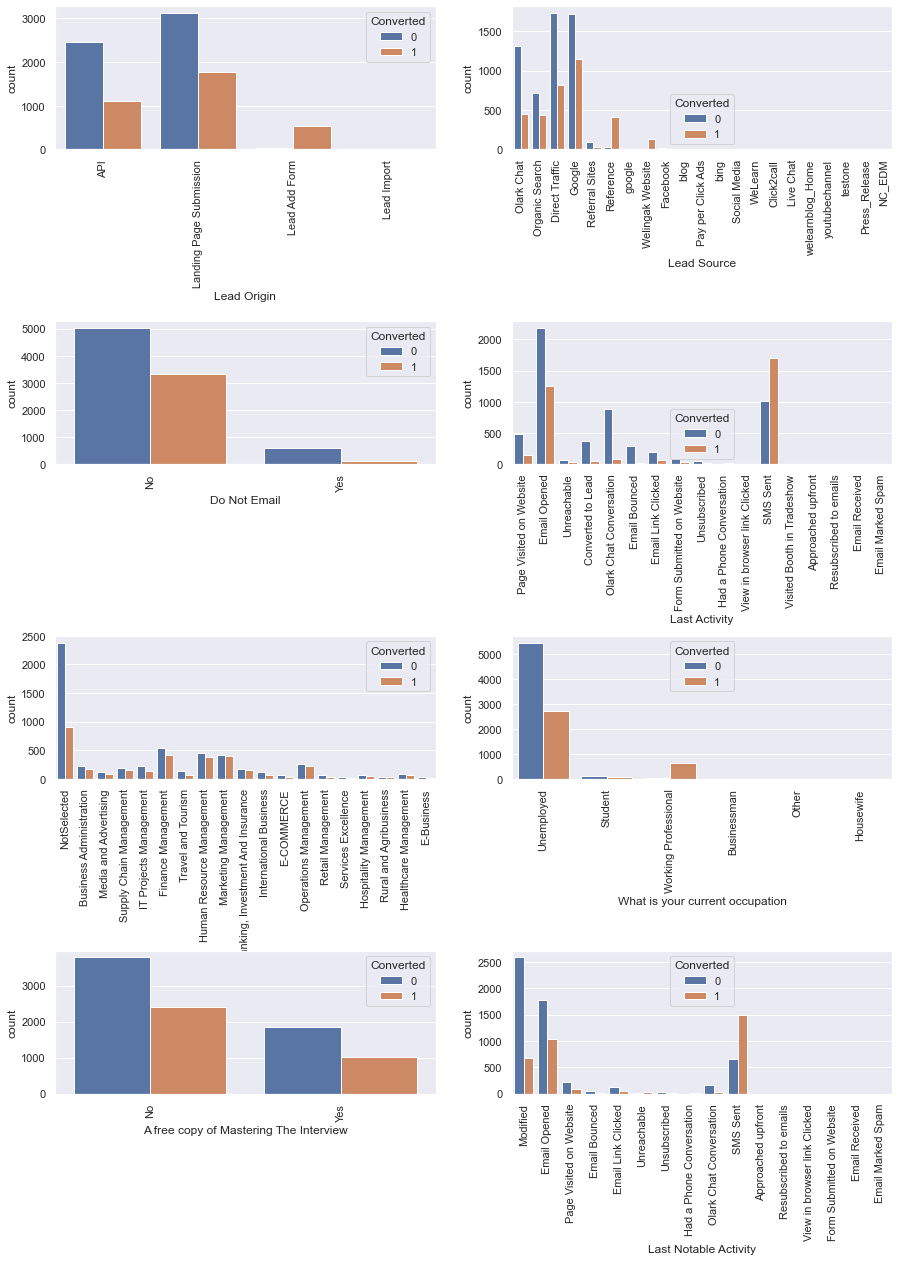

In [94]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

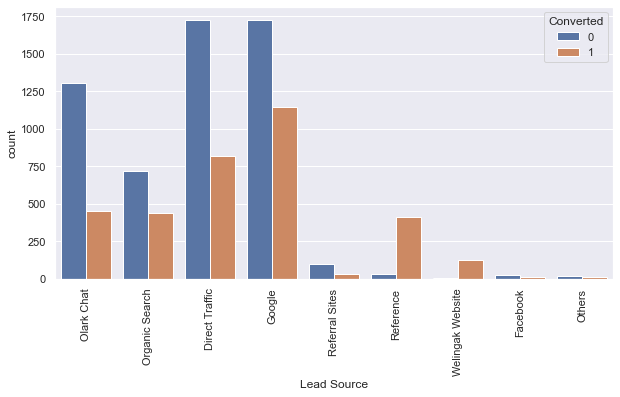

In [95]:
#Update Lead source

#  replace 'google' with 'Google' and others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)

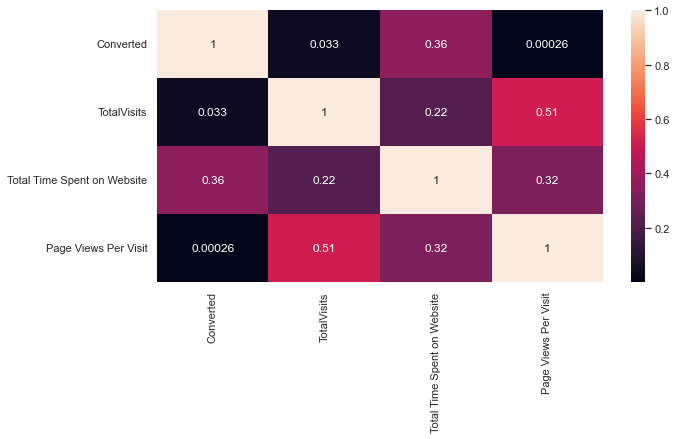

In [96]:
# Check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_df.corr(),annot=True)
plt.show()

In [97]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [98]:
#Create dummy variables for categorical variables
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']], drop_first=True)

# Results should be added to the master dataframe.
leads_df = pd.concat([leads_df, dummy], axis=1)

In [99]:
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_df.head()                     

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NotSelected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Split Train& Test data

In [100]:
# Import the required library
from sklearn.model_selection import train_test_split
# Assign feature variable to X.
X = leads_df.drop(['Converted'], 1)
y = leads_df['Converted']


In [101]:
#Dividing 70-30


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [106]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NotSelected,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1289,0.014184,0.612676,0.083333,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


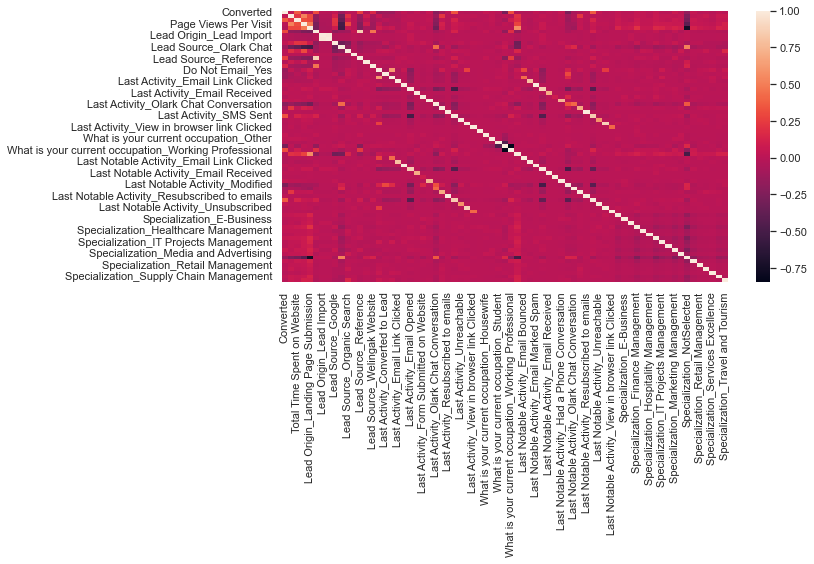

In [103]:
#Check correlation
plt.figure(figsize=(10,5))
sns.heatmap(leads_df.corr())
plt.show()

### Building model

In [108]:
# Import Sklearn Library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 20
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [109]:
# Now let's look at the characteristics that RFE has chosen.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 48),
 ('Last Activity_Email Marked Spam', False, 20),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Email Received', False, 40),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activit

In [111]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [112]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.9
Date:                Tue, 15 Nov 2022   Deviance:                       5367.8
Time:                        11:53:41   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8293      0.130      6.395      0.000       0.575       1.083
Total Time Spent on Website                              4.0329      0.151     26.706      0.000       3.737       4.329
Lead Origin_Landing Page Submission                     -1.5033      0.120    -12.521      0.000      -1.739      -1.268
Lead Origin_Lead Add Form                                2.7955      0.229     12.199      0.000       2.346       3.245
Lead Source_Welingak Website                             3.2541      1.041      3.126      0.002       1.214       5.294
Do Not Email_Yes                                        -1.6528      0.175     -9.446      0.000      -1.996      -1.310
Last Activity_Had a Phone Conversation                   1.5284      0.708      2.160      0.031       0.141       2.915
Last Activity_Olark Chat Conversation                   -0.9715      0.197     -4.930      0.000      -1.358      -0.585
What is your current occupation_Housewife               23.1298   1.79e+04      0.001      0.999   -3.51e+04    3.52e+04
What is your current occupation_Working Professional     2.6278      0.197     13.350      0.000       2.242       3.014
Last Notable Activity_Email Link Clicked                -1.8606      0.275     -6.766      0.000      -2.399      -1.322
Last Notable Activity_Email Opened                      -1.3621      0.086    -15.751      0.000      -1.532      -1.193
Last Notable Activity_Modified                          -1.8671      0.095    -19.568      0.000      -2.054      -1.680
Last Notable Activity_Olark Chat Conversation           -1.7170      0.393     -4.373      0.000      -2.487      -0.947
Last Notable Activity_Page Visited on Website           -1.6647      0.192     -8.649      0.000      -2.042      -1.287
Specialization_NotSelected                              -1.1304      0.122     -9.232      0.000      -1.370      -0.890
========================================================================================================================
"""

In [113]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.93
11,Last Notable Activity_Modified,2.37
14,Specialization_NotSelected,2.15
10,Last Notable Activity_Email Opened,1.89
0,Total Time Spent on Website,1.88
6,Last Activity_Olark Chat Conversation,1.83
2,Lead Origin_Lead Add Form,1.46
12,Last Notable Activity_Olark Chat Conversation,1.37
3,Lead Source_Welingak Website,1.34
8,What is your current occupation_Working Profes...,1.17


In [115]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [117]:
# Refit the modle 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.7
Date:                Tue, 15 Nov 2022   Deviance:                       5377.4
Time:                        11:55:31   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8296      0.130      6.401      0.000       0.576       1.084
Total Time Spent on Website                              4.0283      0.151     26.700      0.000       3.733       4.324
Lead Origin_Landing Page Submission                     -1.5005      0.120    -12.512      0.000      -1.736      -1.265
Lead Origin_Lead Add Form                                2.7997      0.229     12.224      0.000       2.351       3.249
Lead Source_Welingak Website                             3.2491      1.041      3.121      0.002       1.209       5.289
Do Not Email_Yes                                        -1.6543      0.175     -9.458      0.000      -1.997      -1.311
Last Activity_Had a Phone Conversation                   1.5250      0.707      2.156      0.031       0.139       2.911
Last Activity_Olark Chat Conversation                   -0.9738      0.197     -4.943      0.000      -1.360      -0.588
What is your current occupation_Working Professional     2.6231      0.197     13.329      0.000       2.237       3.009
Last Notable Activity_Email Link Clicked                -1.8602      0.275     -6.765      0.000      -2.399      -1.321
Last Notable Activity_Email Opened                      -1.3569      0.086    -15.704      0.000      -1.526      -1.188
Last Notable Activity_Modified                          -1.8624      0.095    -19.539      0.000      -2.049      -1.676
Last Notable Activity_Olark Chat Conversation           -1.7121      0.393     -4.361      0.000      -2.482      -0.943
Last Notable Activity_Page Visited on Website           -1.6645      0.192     -8.650      0.000      -2.042      -1.287
Specialization_NotSelected                              -1.1332      0.122     -9.261      0.000      -1.373      -0.893
========================================================================================================================
"""

In [118]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.93
10,Last Notable Activity_Modified,2.37
13,Specialization_NotSelected,2.15
9,Last Notable Activity_Email Opened,1.89
0,Total Time Spent on Website,1.88
6,Last Activity_Olark Chat Conversation,1.83
2,Lead Origin_Lead Add Form,1.46
11,Last Notable Activity_Olark Chat Conversation,1.37
3,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.17


### Model Evaluation

In [119]:
#Training set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.608300
3604    0.122600
5584    0.668877
7679    0.103047
7563    0.266220
7978    0.929536
7780    0.132919
7863    0.987730
838     0.779383
708     0.341836
dtype: float64

In [120]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.60829979, 0.12260044, 0.66887703, 0.10304722, 0.26621954,
       0.92953567, 0.13291908, 0.98773025, 0.7793833 , 0.34183563])

In [121]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.608300
1,0,0.122600
2,0,0.668877
3,0,0.103047
4,0,0.266220


In [122]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.608300,1
1,0,0.122600,0
2,0,0.668877,1
3,0,0.103047,0
4,0,0.266220,0


In [123]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3451  444]
 [ 806 1650]]


In [125]:
print("Accuracy: ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.8031806014800819


In [131]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("sensitivity: ", TP/(TP+FN))
print("Specificity: ", TN/(TN+FP))

sensitivity:  0.6718241042345277
Specificity:  0.886007702182285


### Finding the Optimal Cutoff


In [132]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

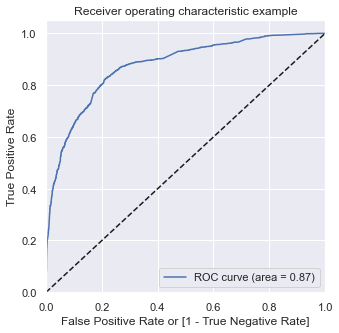

In [134]:
# Call the ROC function using matplotlib
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


In [135]:
 # the construction of columns with various probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.608300,1,1,1,1,1,1,1,1,0,0,0
1,0,0.122600,0,1,1,0,0,0,0,0,0,0,0
2,0,0.668877,1,1,1,1,1,1,1,1,0,0,0
3,0,0.103047,0,1,1,0,0,0,0,0,0,0,0
4,0,0.266220,0,1,1,1,0,0,0,0,0,0,0


In [136]:
# making a dataframe to see the accuracy, sensitivity, and specificity values at various cutoffs for probability
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#Creating a complex matrix to determine the sensitivity, accuracy, and specificity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.548575  0.978420  0.277535
0.2   0.2  0.759093  0.889658  0.676765
0.3   0.3  0.791844  0.849756  0.755327
0.4   0.4  0.803810  0.787052  0.814377
0.5   0.5  0.803181  0.671824  0.886008
0.6   0.6  0.796882  0.592834  0.925546
0.7   0.7  0.777673  0.504072  0.950193
0.8   0.8  0.756259  0.412052  0.973299
0.9   0.9  0.712329  0.274023  0.988703


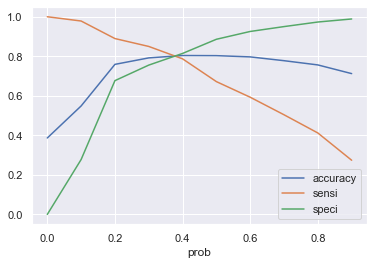

In [137]:
#  plot it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.608300,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.122600,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.668877,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.103047,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.266220,0,1,1,1,0,0,0,0,0,0,0,0


In [139]:
#Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7998740355849473

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3039,  856],
       [ 415, 2041]], dtype=int64)

In [141]:
# evaluate the other metrics as well
# true positive 
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0] 

In [142]:
print("sensitivity: ", TP/(TP+FN))
print("Specificity: ", TN/(TN+FP))

sensitivity:  0.8310260586319218
Specificity:  0.7802310654685494


### TestSet predictions

In [144]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
col = X_train.columns                                                                                                          

In [145]:
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Specialization_NotSelected
8308,1.0,229.126742,1,0,0,0,0,0,0,0,0,1,0,0,0
7212,1.0,0.938748,1,0,0,0,0,0,1,0,0,0,0,0,0
2085,1.0,0.213575,0,1,1,0,0,0,0,0,1,0,0,0,1
4048,1.0,339.111421,1,0,0,0,0,0,0,0,0,0,0,0,0
4790,1.0,3.114269,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.213575,0,0,0,0,0,1,0,0,0,1,0,0,0
8179,1.0,81.916479,1,0,0,0,0,0,0,0,0,1,0,0,0
6236,1.0,0.213575,0,0,0,0,0,0,0,0,1,0,0,0,1
5240,1.0,252.090576,1,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,0.996775
2,1,0.994773
3,1,1.000000
4,0,0.999973


In [147]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,1.000000,1
1,1,0.996775,1
2,1,0.994773,1
3,1,1.000000,1
4,0,0.999973,1
...,...,...,...
2718,1,0.241179,0
2719,0,1.000000,1
2720,0,0.309990,0
2721,1,1.000000,1


In [148]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.4744766801322071